In [2]:
import numpy as np
import pandas as pd
import os
for dirname, _,filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname ,filename))


In [4]:
df =pd.read_csv('Admission_Predict.csv')

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.shape

(400, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [11]:
df.duplicated().sum()

0

In [23]:
df.columns = df.columns.str.strip()
print(df.columns)


Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')


In [24]:
X = df.drop(columns=["Chance of Admit"])
y = df["Chance of Admit"]


In [21]:
print(df.columns.tolist())


['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


In [13]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [14]:
X=df.iloc[:0:-1]
y=df.iloc[:,-1]

In [15]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
399,333,117,4,5.0,4.0,9.66,1,0.95
398,312,103,3,3.5,4.0,8.78,0,0.67
397,330,116,4,5.0,4.5,9.45,1,0.91
396,325,107,3,3.0,3.5,9.11,1,0.84
395,324,110,3,3.5,3.5,9.04,1,0.82
...,...,...,...,...,...,...,...,...
5,330,115,5,4.5,3.0,9.34,1,0.90
4,314,103,2,2.0,3.0,8.21,0,0.65
3,322,110,3,3.5,2.5,8.67,1,0.80
2,316,104,3,3.0,3.5,8.00,1,0.72


In [16]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1)

In [26]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
93,301,97,2,3.0,3.0,7.88,1
23,334,119,5,5.0,4.5,9.70,1
299,305,112,3,3.0,3.5,8.65,0
13,307,109,3,4.0,3.0,8.00,1
90,318,106,2,4.0,4.0,7.92,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
X_train_scaled

array([[0.22      , 0.17857143, 0.25      , ..., 0.42857143, 0.25      ,
        1.        ],
       [0.88      , 0.96428571, 1.        , ..., 0.85714286, 0.91911765,
        1.        ],
       [0.3       , 0.71428571, 0.5       , ..., 0.57142857, 0.53308824,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.70220588,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.74632353,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.22058824,
        0.        ]])

In [30]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [43]:
model =  Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [46]:
history =  model.fit(X_train_scaled,y_train,epochs =30,validation_split=0.2)

Epoch 1/30
8/8 [==============================] - 0s 13ms/step - loss: 0.8890 - val_loss: 0.9179
Epoch 2/30
8/8 [==============================] - 0s 3ms/step - loss: 0.8087 - val_loss: 0.8409
Epoch 3/30
8/8 [==============================] - 0s 4ms/step - loss: 0.7415 - val_loss: 0.7760
Epoch 4/30
8/8 [==============================] - 0s 3ms/step - loss: 0.6855 - val_loss: 0.7201
Epoch 5/30
8/8 [==============================] - 0s 3ms/step - loss: 0.6351 - val_loss: 0.6658
Epoch 6/30
8/8 [==============================] - 0s 3ms/step - loss: 0.5834 - val_loss: 0.6056
Epoch 7/30
8/8 [==============================] - 0s 4ms/step - loss: 0.5276 - val_loss: 0.5415
Epoch 8/30
8/8 [==============================] - 0s 4ms/step - loss: 0.4718 - val_loss: 0.4820
Epoch 9/30
8/8 [==============================] - 0s 4ms/step - loss: 0.4211 - val_loss: 0.4344
Epoch 10/30
8/8 [==============================] - 0s 4ms/step - loss: 0.3815 - val_loss: 0.3980
Epoch 11/30
8/8 [=====================

In [47]:
y_pred = model.predict(X_test_scaled)

3/3 [==============================] - 0s 1ms/step


In [48]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


R2 Score: 0.6989967535937822


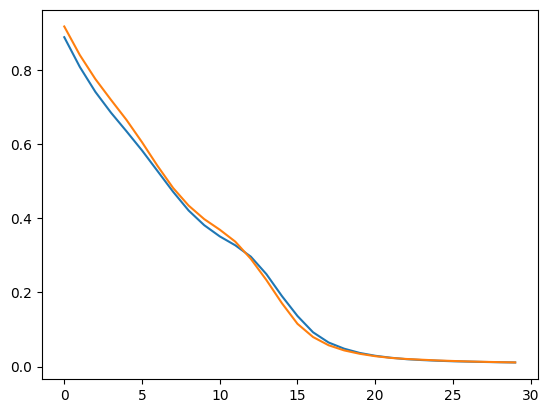

In [49]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])